In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import os
from tqdm import tqdm
import cv2

import shutil

In [3]:
from google.colab import files

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c umor-classification

umor-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
!unzip umor-classification.zip

Archive:  umor-classification.zip
replace images/images/1006.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

### Load the CSV files containing the data:

In [ ]:
# # Load and preprocess training images
image_folder   = '/content/images/images/'

In [ ]:
print(f"There are {len(os.listdir(image_folder ))} images in  dataset")

In [ ]:
train_df  = pd.read_csv('trainset.csv')
test_df   = pd.read_csv('testset.csv')

In [ ]:
train_df['Class'].value_counts()

In [ ]:
train_df[:50]

In [ ]:
image_filenames = os.listdir(image_folder)

In [ ]:
id_to_label = dict(zip(train_df['Id'], train_df['Class']))

In [ ]:
def load_images_with_labels(df):
    images = []
    labels = []
    for index, row in df.iterrows():
        image_id = row['Id']
        if image_id in id_to_label:
            label = id_to_label[image_id]

            image_path = os.path.join(image_folder, f"{image_id}.png")
            if os.path.exists(image_path):  # Check if the image file exists
                image = cv2.imread(image_path)  # Load the image using cv2

                if image is not None:  # Check if the image was loaded successfully
                    images.append(image)
                    labels.append(label)
                else:
                    print(f"Warning: Unable to load image: {image_path}")
            else:
                print(f"Warning: Image not found: {image_path}")
    return np.array(images), np.array(labels)

In [ ]:
X_train, y_train = load_images_with_labels(train_df)

In [ ]:
y_train

In [ ]:
image_filenames = [filename for filename in os.listdir(image_folder) if filename.endswith(".png")]
image_ids = [int(image_id[:-4]) for image_id in image_filenames if image_id[:-4].isnumeric()]

# Get the image IDs included in the training set
train_image_ids = set(train_df['Id'])

In [ ]:
# Get the image IDs from the test CSV
test_image_ids = list(test_df['Id'])

In [ ]:
remaining_test_image_ids = [image_id for image_id in test_image_ids if image_id not in train_image_ids]

In [ ]:
def load_remaining_test_images(image_ids):
    images = []
    for image_id in image_ids:
        image_path = os.path.join(image_folder, f"{image_id}.png")
        image = cv2.imread(image_path)
        if image is not None:
            images.append(image)
    return np.array(images)

In [ ]:
X_test = load_remaining_test_images(remaining_test_image_ids)

In [ ]:
X_test.shape

In [23]:
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create separate lists for each class
benign_images = []
malignant_images = []
normal_images = []

# Iterate through the training data and populate the lists based on class
for image, label in zip(X_train, y_train):
    if label == "Benign":
        benign_images.append(image)
    elif label == "Malignant":
        malignant_images.append(image)
    elif label == "Normal":
        normal_images.append(image)

In [24]:
benign_images

[array([[[  5,   5,   5],
         [ 18,  18,  18],
         [151, 151, 151],
         ...,
         [132, 132, 132],
         [108, 108, 108],
         [ 69,  69,  69]],
 
        [[  1,   1,   1],
         [ 35,  35,  35],
         [133, 133, 133],
         ...,
         [122, 122, 122],
         [120, 120, 120],
         [105, 105, 105]],
 
        [[  7,   7,   7],
         [ 66,  66,  66],
         [ 96,  96,  96],
         ...,
         [139, 139, 139],
         [135, 135, 135],
         [128, 128, 128]],
 
        ...,
 
        [[ 60,  60,  60],
         [ 58,  58,  58],
         [ 58,  58,  58],
         ...,
         [ 70,  70,  70],
         [ 67,  67,  67],
         [ 64,  64,  64]],
 
        [[ 64,  64,  64],
         [ 67,  67,  67],
         [ 68,  68,  68],
         ...,
         [ 75,  75,  75],
         [ 74,  74,  74],
         [ 73,  73,  73]],
 
        [[ 46,  46,  46],
         [ 49,  49,  49],
         [ 51,  51,  51],
         ...,
         [ 85,  85,  85],
  

In [25]:
malignant_images

[array([[[202, 202, 202],
         [ 43,  43,  43],
         [  2,   2,   2],
         ...,
         [116, 116, 116],
         [107, 107, 107],
         [103, 103, 103]],
 
        [[203, 203, 203],
         [ 42,  42,  42],
         [  0,   0,   0],
         ...,
         [118, 118, 118],
         [109, 109, 109],
         [105, 105, 105]],
 
        [[198, 198, 198],
         [ 51,  51,  51],
         [  3,   3,   3],
         ...,
         [113, 113, 113],
         [106, 106, 106],
         [102, 102, 102]],
 
        ...,
 
        [[ 23,  23,  23],
         [ 23,  23,  23],
         [ 23,  23,  23],
         ...,
         [ 28,  28,  28],
         [ 27,  27,  27],
         [ 27,  27,  27]],
 
        [[ 28,  28,  28],
         [ 27,  27,  27],
         [ 25,  25,  25],
         ...,
         [ 33,  33,  33],
         [ 32,  32,  32],
         [ 31,  31,  31]],
 
        [[ 31,  31,  31],
         [ 29,  29,  29],
         [ 26,  26,  26],
         ...,
         [ 35,  35,  35],
  

In [26]:
normal_images

[array([[[ 76,  76,  76],
         [ 79,  79,  79],
         [ 79,  79,  79],
         ...,
         [ 70,  70,  70],
         [ 67,  67,  67],
         [ 65,  65,  65]],
 
        [[157, 157, 157],
         [159, 159, 159],
         [162, 162, 162],
         ...,
         [173, 173, 173],
         [166, 166, 166],
         [162, 162, 162]],
 
        [[142, 142, 142],
         [148, 148, 148],
         [159, 159, 159],
         ...,
         [181, 181, 181],
         [176, 176, 176],
         [172, 172, 172]],
 
        ...,
 
        [[  4,   4,   4],
         [  7,   7,   7],
         [ 12,  12,  12],
         ...,
         [ 13,  13,  13],
         [ 13,  13,  13],
         [ 13,  13,  13]],
 
        [[  7,   7,   7],
         [ 12,  12,  12],
         [ 14,  14,  14],
         ...,
         [ 16,  16,  16],
         [ 14,  14,  14],
         [ 12,  12,  12]],
 
        [[ 12,  12,  12],
         [ 17,  17,  17],
         [ 18,  18,  18],
         ...,
         [ 18,  18,  18],
  

In [27]:
# Define the image ID you want to plot
image_id_to_plot = 557

# Find the index of the image with the specified ID in the benign_images array
index_to_plot = np.where(train_df['Id'] == image_id_to_plot)[0]

if len(index_to_plot) > 0:
    index_to_plot = index_to_plot[0]  # Take the first index if multiple are found
    plt.figure(figsize=(5, 5))
    plt.imshow(benign_images[index_to_plot])
    plt.title(f"Image ID: {image_id_to_plot} - Class: Benign")
    plt.axis('off')
    plt.show()
else:
    print(f"Image ID not found: {image_id_to_plot}")

Image ID not found: 557


In [28]:
# Convert lists to numpy arrays
benign_images = np.array(benign_images)
malignant_images = np.array(malignant_images)
normal_images = np.array(normal_images)

<ipython-input-28-cff8334a8deb>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  benign_images = np.array(benign_images)
<ipython-input-28-cff8334a8deb>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  malignant_images = np.array(malignant_images)
<ipython-input-28-cff8334a8deb>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  norma

In [29]:
# Find the count of each class
benign_count = benign_images.shape[0]
malignant_count = malignant_images.shape[0]
normal_count = normal_images.shape[0]


In [30]:
# Determine the maximum class count
max_class_count = max(benign_count, malignant_count, normal_count)

In [31]:
max_class_count

300

In [32]:
# Function to perform data augmentation for medical images
def perform_data_augmentation(images, desired_count):
    augmented_images = []
    current_count = images.shape[0]

    while current_count < desired_count:
        random_index = np.random.randint(0, images.shape[0])
        original_image = images[random_index]

        datagen = ImageDataGenerator(
            rotation_range=15,
            width_shift_range=0.1,
            height_shift_range=0.1,
            shear_range=0.1,
            zoom_range=0.1,
            horizontal_flip=True,
            fill_mode='nearest'
        )

        augmented_image = datagen.random_transform(original_image)
        augmented_images.append(augmented_image)

        current_count += 1

    return np.array(augmented_images)


In [33]:
# Perform data augmentation for the minority classes
augmented_malignant = perform_data_augmentation(malignant_images, max_class_count)
augmented_normal = perform_data_augmentation(normal_images, max_class_count)


<ipython-input-32-1361ae04d553>:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(augmented_images)


In [34]:
# Concatenate the balanced data
balanced_X_train = np.concatenate((benign_images, augmented_malignant, augmented_normal))
balanced_y_train = np.concatenate((
    np.array(["Benign"] * benign_count),
    np.array(["Malignant"] * (max_class_count - malignant_count)),
    np.array(["Normal"] * (max_class_count - normal_count))
))


In [35]:
# Shuffle the balanced data
balanced_X_train, balanced_y_train = shuffle(balanced_X_train, balanced_y_train)


In [36]:
balanced_y_train

array(['Normal', 'Normal', 'Normal', 'Benign', 'Benign', 'Normal',
       'Normal', 'Normal', 'Benign', 'Benign', 'Benign', 'Normal',
       'Normal', 'Benign', 'Normal', 'Normal', 'Benign', 'Normal',
       'Malignant', 'Benign', 'Normal', 'Normal', 'Malignant', 'Benign',
       'Malignant', 'Malignant', 'Benign', 'Normal', 'Normal', 'Normal',
       'Benign', 'Normal', 'Normal', 'Malignant', 'Malignant', 'Benign',
       'Malignant', 'Benign', 'Benign', 'Benign', 'Benign', 'Malignant',
       'Benign', 'Malignant', 'Normal', 'Normal', 'Normal', 'Malignant',
       'Benign', 'Benign', 'Benign', 'Benign', 'Malignant', 'Benign',
       'Malignant', 'Normal', 'Benign', 'Normal', 'Normal', 'Benign',
       'Malignant', 'Normal', 'Benign', 'Benign', 'Benign', 'Benign',
       'Benign', 'Normal', 'Benign', 'Benign', 'Normal', 'Malignant',
       'Malignant', 'Benign', 'Benign', 'Malignant', 'Normal', 'Normal',
       'Malignant', 'Malignant', 'Benign', 'Benign', 'Malignant',
       'Benign'

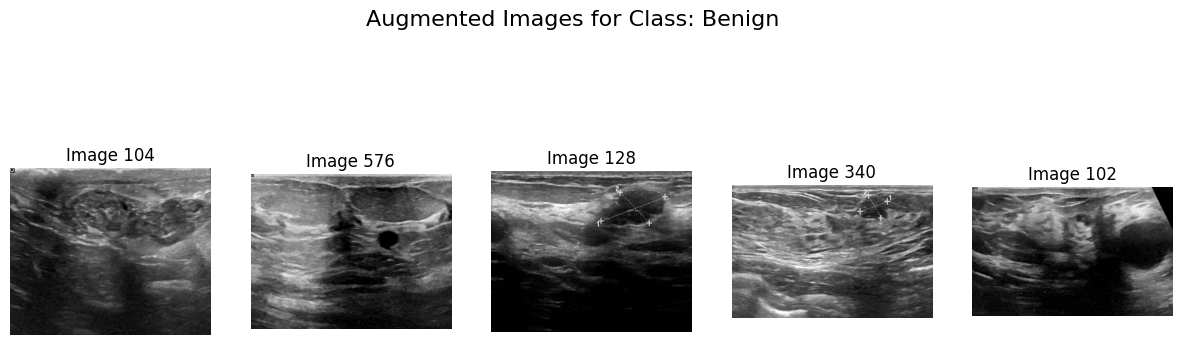

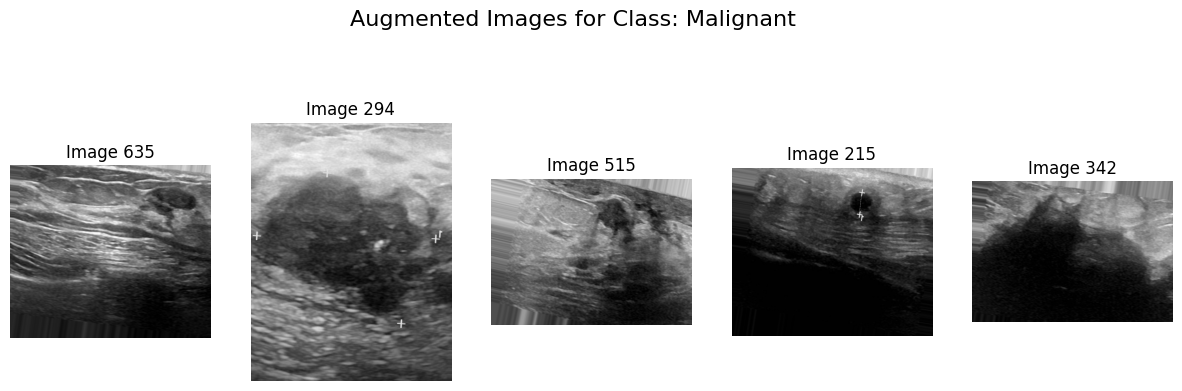

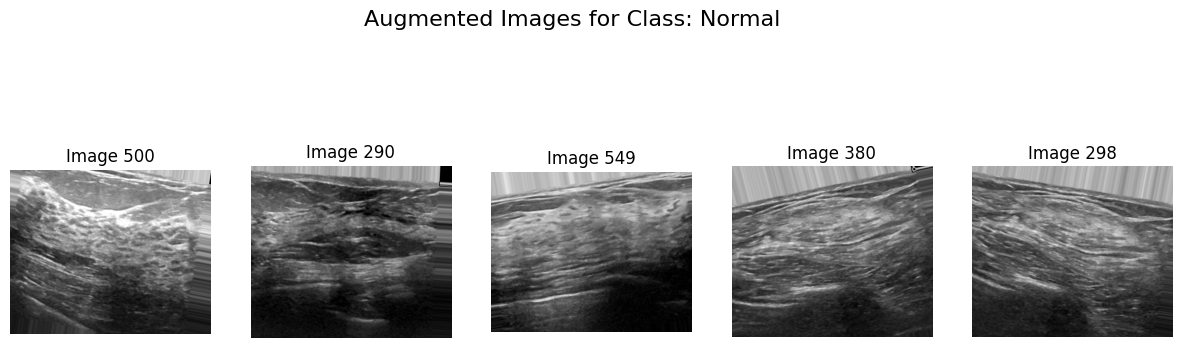

In [37]:
# Display a few augmented images for each class
unique_classes, class_counts = np.unique(balanced_y_train, return_counts=True)
num_images_to_visualize = 5

for class_name in unique_classes:
    class_indices = np.where(balanced_y_train == class_name)[0]
    random_indices = np.random.choice(class_indices, num_images_to_visualize, replace=False)

    plt.figure(figsize=(15, 5))
    plt.suptitle(f"Augmented Images for Class: {class_name}", fontsize=16)

    for i, index in enumerate(random_indices):
        plt.subplot(1, num_images_to_visualize, i + 1)
        plt.imshow(balanced_X_train[index])
        plt.title(f"Image {index}")
        plt.axis('off')

    plt.show()



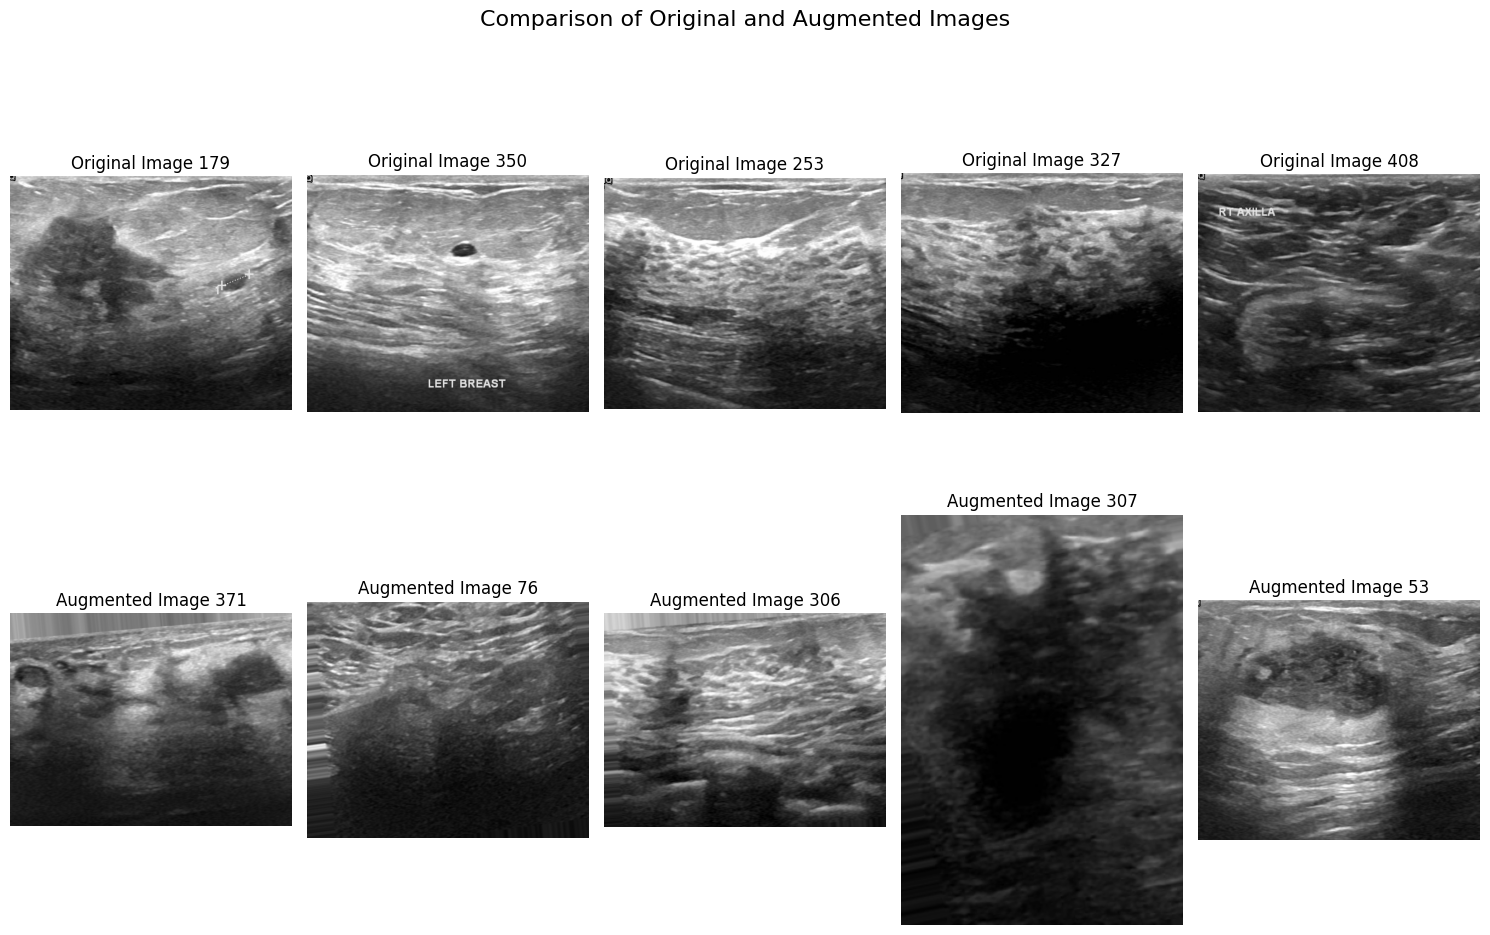

In [38]:
import random

# Choose random indices from both arrays
num_samples_to_visualize = 5
random_indices_original = random.sample(range(X_train.shape[0]), num_samples_to_visualize)
random_indices_balanced = random.sample(range(balanced_X_train.shape[0]), num_samples_to_visualize)

plt.figure(figsize=(15, 10))
plt.suptitle("Comparison of Original and Augmented Images", fontsize=16)

for i in range(num_samples_to_visualize):
    # Plot original image
    plt.subplot(2, num_samples_to_visualize, i + 1)
    plt.imshow(X_train[random_indices_original[i]])
    plt.title(f"Original Image {random_indices_original[i]}")
    plt.axis('off')

    # Plot augmented image
    plt.subplot(2, num_samples_to_visualize, num_samples_to_visualize + i + 1)
    plt.imshow(balanced_X_train[random_indices_balanced[i]])
    plt.title(f"Augmented Image {random_indices_balanced[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [39]:
balanced_X_train[0].shape

(490, 548, 3)

In [40]:
def resize_and_normalize_image(image, desired_size):
    # Resize the image
    resized_image = cv2.resize(image, desired_size)

    # Normalize the image by dividing each pixel value by 255
    normalized_image = resized_image / 255.0

    return normalized_image

def resize_and_normalize_images(image_array, desired_size):
    normalized_images = []

    for image in image_array:
        normalized_image = resize_and_normalize_image(image, desired_size)
        normalized_images.append(normalized_image)

    return np.array(normalized_images)

# Example usage
desired_image_size = (256, 256)  # Adjust the desired size

# Resize and normalize images in balanced_X_train
normalized_balanced_X_train = resize_and_normalize_images(balanced_X_train, desired_image_size)

# Resize and normalize images in X_test
normalized_X_test = resize_and_normalize_images(X_test, desired_image_size)

In [41]:
# def resize_and_normalize_images(image_array, desired_size):
#     normalized_images = []

#     for image in image_array:
#         normalized_image = resize_and_normalize_image(image, desired_size)
#         normalized_images.append(normalized_image)

#     return np.array(normalized_images)

# # Example usage
# desired_image_size = (256, 256)  # Adjust the desired size

# # Resize and normalize images in balanced_X_train
# normalized_balanced_X_train = resize_and_normalize_images(balanced_X_train, desired_image_size)

# # Resize and normalize images in X_test
# normalized_X_test = resize_and_normalize_images(X_test, desired_image_size)

In [42]:
normalized_balanced_X_train[0]

array([[[0.66666667, 0.66666667, 0.66666667],
        [0.65490196, 0.65490196, 0.65490196],
        [0.61568627, 0.61568627, 0.61568627],
        ...,
        [0.15686275, 0.15686275, 0.15686275],
        [0.15294118, 0.15294118, 0.15294118],
        [0.14901961, 0.14901961, 0.14901961]],

       [[0.54509804, 0.54509804, 0.54509804],
        [0.49019608, 0.49019608, 0.49019608],
        [0.43921569, 0.43921569, 0.43921569],
        ...,
        [0.14509804, 0.14509804, 0.14509804],
        [0.14509804, 0.14509804, 0.14509804],
        [0.14117647, 0.14117647, 0.14117647]],

       [[0.34509804, 0.34509804, 0.34509804],
        [0.34117647, 0.34117647, 0.34117647],
        [0.3372549 , 0.3372549 , 0.3372549 ],
        ...,
        [0.15686275, 0.15686275, 0.15686275],
        [0.16862745, 0.16862745, 0.16862745],
        [0.18039216, 0.18039216, 0.18039216]],

       ...,

       [[0.05490196, 0.05490196, 0.05490196],
        [0.05882353, 0.05882353, 0.05882353],
        [0.0627451 , 0

In [43]:
le = LabelEncoder()
balanced_y_train = le.fit_transform(balanced_y_train)


In [44]:
balanced_y_train

array([2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 1, 0, 2, 2,
       1, 0, 1, 1, 0, 2, 2, 2, 0, 2, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       2, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 0, 2, 2, 0, 1, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 1, 0, 0, 1, 0, 0, 1, 2, 0,
       1, 0, 1, 0, 2, 1, 0, 1, 0, 2, 1, 0, 1, 0, 0, 0, 0, 2, 1, 2, 0, 0,
       2, 0, 0, 0, 2, 1, 0, 2, 0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0,
       0, 2, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 2, 0,
       2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 0, 1, 2, 2, 0, 0, 2, 0, 1,
       0, 1, 0, 0, 2, 0, 1, 1, 0, 1, 2, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 2,
       1, 1, 2, 2, 2, 0, 2, 0, 1, 1, 0, 2, 0, 0, 0, 2, 0, 1, 1, 0, 2, 0,
       0, 0, 1, 2, 1, 0, 2, 1, 2, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 1, 1, 2,
       1, 0, 0, 2, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 2, 0, 0,
       0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2, 2, 1, 1, 1, 0, 2, 0,
       2, 0, 0, 0, 2, 1, 1, 0, 1, 0, 2, 0, 2, 0, 0,

In [45]:
X_train,X_val,y_train,y_val = train_test_split(normalized_balanced_X_train,balanced_y_train, test_size=0.2,random_state=42)

In [46]:
X_train.shape,X_val.shape,y_train.shape,y_val.shape

((528, 256, 256, 3), (133, 256, 256, 3), (528,), (133,))

In [47]:
# Flatten the images in X_train and X_val
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_val_flattened = X_val.reshape(X_val.shape[0], -1)
X_train_flattened.shape,X_val_flattened.shape

((528, 196608), (133, 196608))

In [48]:
normalized_X_test = normalized_X_test.reshape(normalized_X_test.shape[0], -1)
normalized_X_test

array([[0.16862745, 0.16862745, 0.16862745, ..., 0.17254902, 0.17254902,
        0.17254902],
       [0.45882353, 0.45882353, 0.45882353, ..., 0.11372549, 0.11372549,
        0.11372549],
       [0.16470588, 0.16470588, 0.16470588, ..., 0.00392157, 0.00392157,
        0.00392157],
       ...,
       [0.44705882, 0.44705882, 0.44705882, ..., 0.09019608, 0.09019608,
        0.09019608],
       [0.15686275, 0.15686275, 0.15686275, ..., 0.22745098, 0.22745098,
        0.22745098],
       [0.00784314, 0.00784314, 0.00784314, ..., 0.07843137, 0.07843137,
        0.07843137]])

In [49]:
normalized_X_test.shape

(229, 196608)

***
to here good

***

In [50]:


#Model building
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier



In [51]:


models =[
         ("SVC", SVC()),
         ("DecisionTree", DecisionTreeClassifier()),
         ("NaiveBayes", GaussianNB()),
         ('RandomForest',RandomForestClassifier( )),
         ('GradientBoost',GradientBoostingClassifier()),
         ('XGBClassifier',XGBClassifier())]



In [ ]:
from catboost import CatBoostClassifier, Pool, cv
from sklearn.model_selection import GridSearchCV
# Create a CatBoostClassifier
catboost = CatBoostClassifier()

# Set up the parameter grid for grid search
param_grid = {
    'iterations': [100, 200, 300],
    'depth': [6, 8, 10],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(catboost, param_grid, cv=3, n_jobs=-1)

# Fit the model
grid_search.fit(X_train_flattened, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

In [ ]:
# Use the best parameters obtained from grid search
best_params = grid_search.best_params_
best_catboost = CatBoostClassifier(iterations=best_params['iterations'], depth=best_params['depth'], learning_rate=best_params['learning_rate'])

In [ ]:
# Fit the best CatBoost model
best_catboost.fit(X_train_flattened, y_train)

In [ ]:
# Predict on the validation set
y_pred = best_catboost.predict(X_val_flattened)

In [ ]:
# Calculate the F1 score
f1 = f1_score(y_val, y_pred, average='weighted')
print("F1 score:", f1)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [52]:
# #Calculating accuracy of different models
# names = []
# accuracies = []
# finalResults = []
# for name,model in models:
#     model.fit(X_train_flattened, y_train)
#     y_pred = model.predict(X_val_flattened)
#     accuracyScore = accuracy_score(y_val, y_pred)
#     accuracies.append(accuracyScore)
#     names.append(name)
#     finalResults.append((name,accuracyScore))

KeyboardInterrupt: ignored

In [ ]:


# #Making data frame of different models with accuracy
# finalResults_df = pd.DataFrame({'Model-Name': names, 'Accuracy-Score': accuracies})
# finalResults_df.sort_values(by='Accuracy-Score', ascending=False)